In [15]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

In [16]:
from skimage import data
import numpy as np
from skimage.morphology import disk
import skimage.filter.rank as skr
from skimage.measure import label
from skimage.morphology import watershed
from skimage.io import imread
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

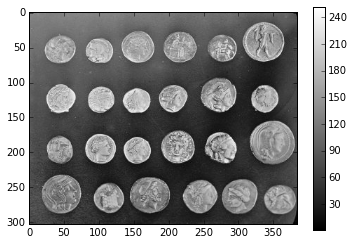

In [17]:
# segment the coins
im = data.coins()
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

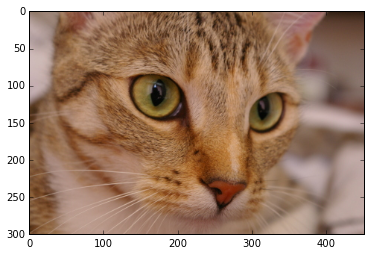

In [18]:
# detect the eyes / nose
im = data.chelsea()
plt.imshow(im);


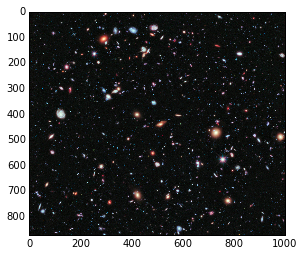

In [19]:
# counting the galaxies
im = data.hubble_deep_field()
plt.imshow(im);

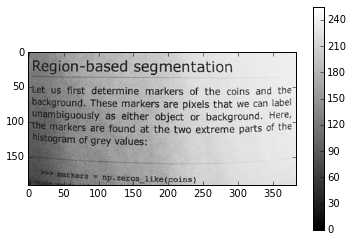

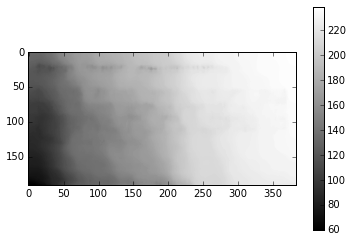

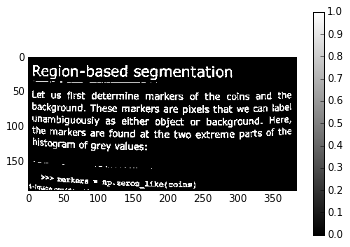

In [20]:
im = data.page()

bg = skr.median(im, disk(10))

res = (1.*im/bg) < .8

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(bg,cmap=plt.cm.gray);
plt.colorbar()
plt.figure()
plt.imshow(res,cmap=plt.cm.gray);
plt.colorbar();


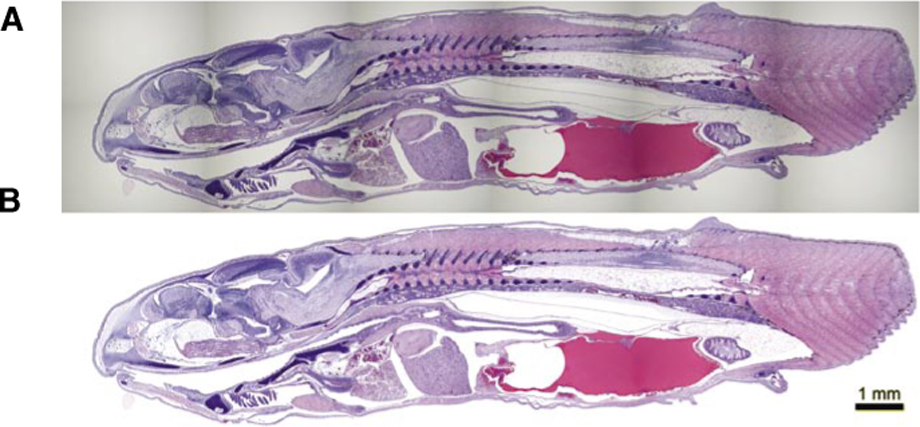

In [21]:
Image('http://www.biotechniques.com/multimedia/archive/00003/BTN_A_000112488_O_F00_3051a.jpg')

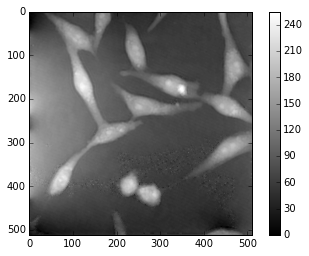

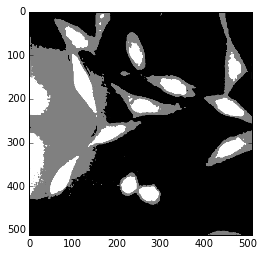

In [22]:
# segment the cells
im = imread('http://homepages.ulb.ac.be/~odebeir/data/dh_phase.png')
th = im>150
th1 = im>100

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(1.*th+th1,cmap=plt.cm.gray)


/home/olivier/anaconda/lib/python2.7/site-packages/skimage/filter/__init__.py:40: skimage_deprecation: Call to deprecated function ``canny``. Use ``skimage.feature.canny`` instead.
  def canny(*args, **kwargs):


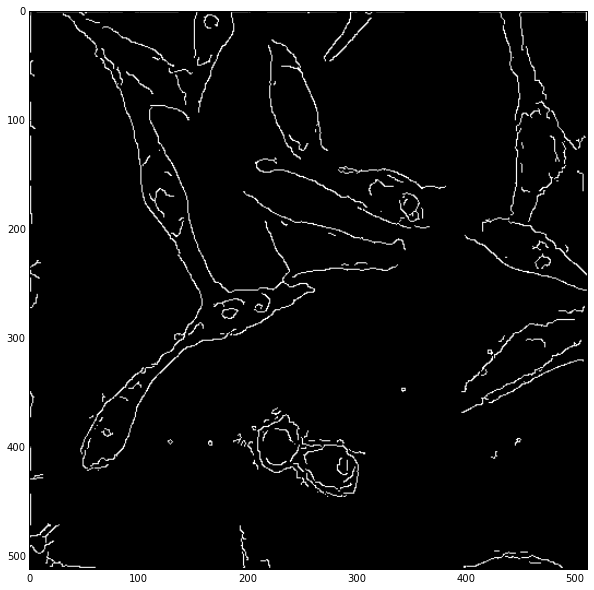

In [23]:
from skimage.filter import canny


ca = canny(im)

plt.figure(figsize=[10,10])
plt.imshow(ca,cmap=plt.cm.gray)

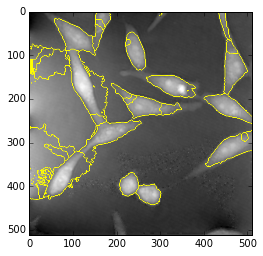

In [24]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
lab,n_lab = label(th,return_num=True)
bg = th1==0
lab[bg] = n_lab+1

#med = skr.median(im,disk(5))
#gr = skr.gradient(med,disk(3))

ws = watershed(255-im,lab)
plt.imshow(mark_boundaries(im,ws))


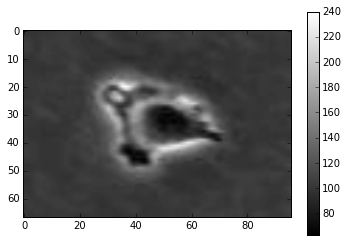

In [25]:
# segment the cell
im = imread('http://homepages.ulb.ac.be/~odebeir/data/exp0001crop.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

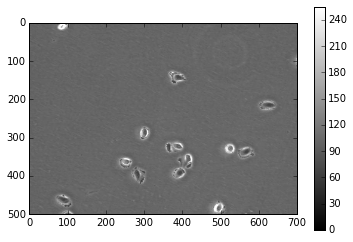

In [26]:
im = imread('http://homepages.ulb.ac.be/~odebeir/data/exp0001.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

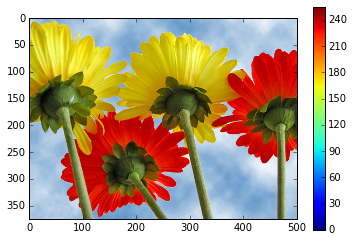

In [27]:
# count red and yellow flowers
im = imread('http://homepages.ulb.ac.be/~odebeir/data/flowers.jpg')
plt.imshow(im)
plt.colorbar();

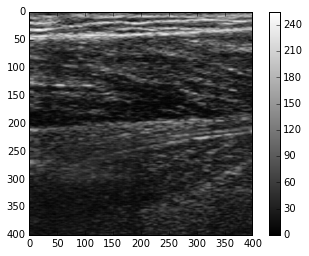

In [28]:
# find the fiber orientation
im = imread('http://homepages.ulb.ac.be/~odebeir/data/image4.png')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo('PUcz11MLxUk', start=0, autoplay=1, theme="light", color="blue",)

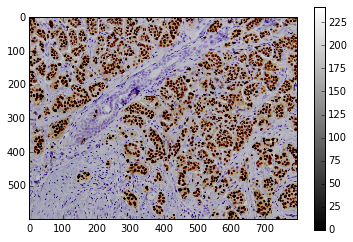

In [30]:
# detect stroma
im = imread('http://homepages.ulb.ac.be/~odebeir/data/Rp042826d.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

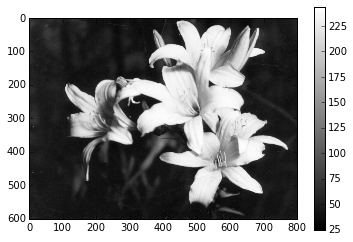

In [31]:
# segment the flowers
im = imread('http://homepages.ulb.ac.be/~odebeir/data/KaneFlowers.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

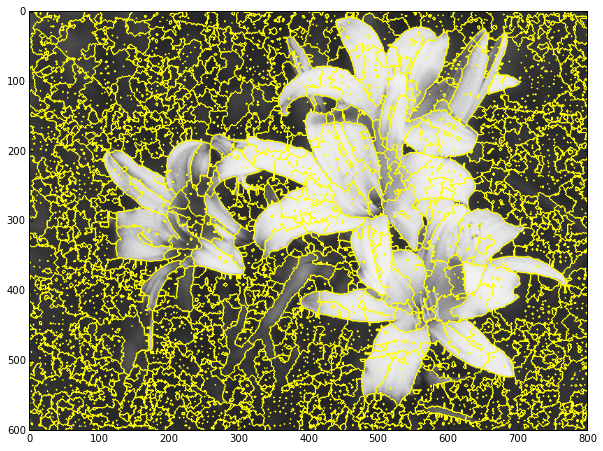

In [32]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries

gr = skr.gradient(im,disk(3))

local_min = im <= skr.minimum(im,disk(5))

lab = label(local_min)

#med = skr.median(im,disk(5))

ws = watershed(gr,lab)

plt.figure(figsize=[10,10])
plt.imshow(mark_boundaries(im,ws))

#plt.imshow(local_min)
